# TAL Labo 1c : mêmes opérations sur une page web en anglais

**Objectif** 

Dans cette troisième partie du Labo1, vous allez refaire une partie des traitements de la partie 1b, mais cette fois-ci sur une page web, spécifiquement une page Wikipedia en anglais (suggestion : "Switzerland").  L'objectif est de réviser les principales commandes apprises, et de traiter le format HTML.

In [1]:
import nltk
import os
from urllib import request
import matplotlib.pyplot 
%matplotlib inline

S'inspirer du [chapitre 3 du livre NLTK](http://www.nltk.org/book/ch03.html) pour faire une requête et récupérer le contenu de la page indiquée dans `url2`.  Quelle est la longueur de la chaîne de caractères obtenue ?

In [2]:
url2 = "https://en.wikipedia.org/wiki/Switzerland" 
html2 = request.urlopen(url2).read().decode('utf8')
print("The length of the html is", len(html2))

The length of the html is 937866


Nous utilserons l'outil `BeautifulSoup` disponible sous forme de module Python pour extraire tout le texte de la page HTML.  Si le contenu de la page est stocké dans `html2`, nous extrayons le texte dans `raw2`.

In [5]:
from bs4 import BeautifulSoup

In [6]:
raw2 = BeautifulSoup(html2).get_text()

Réutilisez la méthode de la partie 1b pour enlever le début et la fin de la chaîne `raw2`, car ils contiennent du texte qui n'est pas pertinent pour notre analyse ("ne parle pas de la Suisse").  Quelle est la longueur du résultat ? Afficher aussi ses 100 premiers et 100 derniers caractères (p.ex. `raw2trimmed`).

In [7]:
# Please write your Python code below and execute it.
lastSentence = "Pinot Noir. Merlot is the main variety produced in Ticino."
start_index = raw2.find("Switzerland, officially the Swiss Confederation") # 1st sentence of the page
end_index = raw2.rfind(lastSentence) # Last sentence of the page

raw2_trimmed = raw2[start_index:end_index + len(lastSentence)]
raw2_trimmed = raw2_trimmed.replace('\r', '')
raw2_trimmed = raw2_trimmed.replace('\n', ' ')

print("The text length is", len(raw2_trimmed))

print("First 100 char :")
print(raw2_trimmed[:100])

print("Last 100 char :")
print(raw2_trimmed[len(raw2_trimmed) - 100:])

The text length is 88458
First 100 char :
Switzerland, officially the Swiss Confederation, is a landlocked country located at the confluence o
Last 100 char :
 Chasselas (called Fendant in Valais) and Pinot Noir. Merlot is the main variety produced in Ticino.


Effectuer la segmentation en phrases, puis tokeniser chaque phrase.  Ecrivez le résultat (une phrase par ligne, espaces entre *tokens*) dans un fichier `sample_web_page.txt` et inspectez-le avec un éditeur de texte.  Observez-vous des imperfections ?

In [11]:
filename = "sample_web_page.txt"

text_sentences = nltk.tokenize.sent_tokenize(raw2_trimmed, language='english')

text_words = list()
for sentence in text_sentences:
    text_words.append(nltk.tokenize.word_tokenize(sentence, language='english', preserve_line=False))

if os.path.exists(filename): 
    os.remove(filename)
with open(filename, 'a', encoding='utf8') as fd:
    for sentence in text_words:
        fd.write(' '.join(sentence) + '\n')

On peut observer dans un premier temps que les références et notes sont incluses (ex: "[f]"). 
De plus, certains diminutifs sont reconnus comme des fin de phrases (ex: "cf." ) à la ligne 27.
Encore, certains tokens ne devrait pas faire partir du texte comme "audio ( help·info )"

Effectuer maintenant la tokenisation de cette page **sans** faire de segmentation en phrases.  Stockez le résultat dans une variable (p.ex. `words2`) sans écrire de fichier.  Combien de tokens possède ce texte ?

In [14]:
word2 = nltk.tokenize.word_tokenize(raw2_trimmed, language='english', preserve_line=False)
print("The number of words is", len(word2))

The number of words is 16788


Créez un objet de type nltk.Text à partir de la liste de *tokens* `words2`.  Appliquez-lui à titre d'exemple les méthodes `concordance`, `similar` et `collocations`. 

In [ ]:
text = nltk.Text(word2)

In [16]:
text.concordance("Switzerland")

Displaying 25 of 212 matches:
 Switzerland , officially the Swiss Confederat
a and Liechtenstein to the east . Switzerland is geographically divided among t
uding Zürich , Geneva and Basel . Switzerland originates from the Old Swiss Con
Reformation of the 16th century , Switzerland has maintained a policy of armed 
the Peace of Westphalia in 1648 . Switzerland has not fought an international w
ding processes worldwide . [ 17 ] Switzerland is the birthplace of the Red Cros
Area through bilateral treaties . Switzerland is a federal republic composed of
icity , and religion , leading to Switzerland being described as a Willensnatio
Due to its linguistic diversity , Switzerland is known by multiple native names
instead of the spoken languages . Switzerland is one of the world 's most devel
roduct per capita . [ 23 ] [ 24 ] Switzerland ranks first in the Human Developm
 Etymology Main article : Name of Switzerland The English name Switzerland is a
e of Switzerland The English name Switzerla

In [17]:
text.similar("Switzerland")

the and basel europe to population geneva nations countries ad gdp
swiss it in with bern under mediation september gaeta


In [21]:
text.collocation_list()

[('citation', 'needed'),
 ('Main', 'article'),
 ('United', 'Nations'),
 ('Main', 'articles'),
 ('St.', 'Gallen'),
 ('Federal', 'Council'),
 ('European', 'Union'),
 ('Swiss', 'Plateau'),
 ('Federal', 'Assembly'),
 ('direct', 'democracy'),
 ('See', 'also'),
 ('per', 'capita'),
 ('Red', 'Cross'),
 ('European', 'countries'),
 ('Holy', 'Roman'),
 ('Statistical', 'Office'),
 ('Catholic', 'Church'),
 ('bilateral', 'agreements'),
 ('deu', 'promoted'),
 ('lat', 'promoted')]

Déterminez le vocabulaire de cette page (la liste des _types_) en convertissant la liste des _tokens_ en un `set`.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [33]:
# Please write your Python code in this cell and execute it.
print("Total number of tokens: ", len(word2))

# Convert token list to set 
unique_tokens = set(word2)
print("Total number of unique tokens: ", len(unique_tokens))

# Words with more than 18 characters
long_words = [w for w in word2 if len(w) > 18]
print("Words with more than 18 characters: ", long_words) 

Total number of tokens:  16788
First 300 unique tokens sorted: 
['$', '%', "'", "''", "'s", "'to", '(', ')', '*', '+1', '+3', ',', '-6', '.', '.ch', '0', '0.1', '0.2', '0.25', '0.3', '0.4', '0.5', '0.52', '0.54', '0.6', '1', '1,000', '1,018', '1,063', '1,487,969', '1,580', '1,638', '1.0', '1.1', '1.3', '1.5', '1.6', '1.7', '1.9', '10', '10.6', '10.7', '100', '100,000', '1000', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '11.35', '11.4', '11.6', '11.7', '110', '111', '112', '113', '114', '114,220', '115', '116', '117', '118', '119', '11th', '11°', '12', '12.4', '120', '120,000', '1200', '121', '122', '123', '124', '125', '125cc', '126', '1263', '1264', '127', '1273', '128', '129', '1291', '13', '13,000', '13,284', '13,642', '13.9', '130', '131', '132', '133', '134', '134,794', '135', '1353', '136', '137', '138', '139', '13th', '14', '14,692', '14.0', '14.7', '140', '140,202', '141', '142', '143', '143,372', '144', '145', '146', '1460', '147', '1470s', '148', '14

Construisez un objet `FreqDist` avec les mots de cette page, en convertissant en minuscules tous les mots contenant seulement des lettres (utilisez la méthode `.isalpha()` de Python).  Quels sont les 30 mots les plus fréquents ?

In [35]:
processed_words = [w.lower() for w in word2 if w.isalpha()]

fdist = nltk.FreqDist(processed_words)
print(fdist)

print("Number of unique words: ", len(fdist))

fdist.most_common(30)

<FreqDist with 2997 samples and 12399 outcomes>
Number of unique words:  2997


[('the', 1127),
 ('of', 550),
 ('and', 440),
 ('in', 430),
 ('to', 232),
 ('switzerland', 212),
 ('a', 182),
 ('swiss', 179),
 ('is', 148),
 ('as', 101),
 ('federal', 92),
 ('by', 87),
 ('are', 87),
 ('was', 86),
 ('for', 81),
 ('with', 73),
 ('from', 68),
 ('it', 60),
 ('at', 52),
 ('world', 52),
 ('on', 50),
 ('has', 46),
 ('its', 43),
 ('most', 41),
 ('population', 39),
 ('one', 39),
 ('an', 38),
 ('cantons', 38),
 ('main', 38),
 ('other', 38)]

Affichez le graphique cumulatif du nombre d'occurrences des 70 mots les plus fréquents de votre texte.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

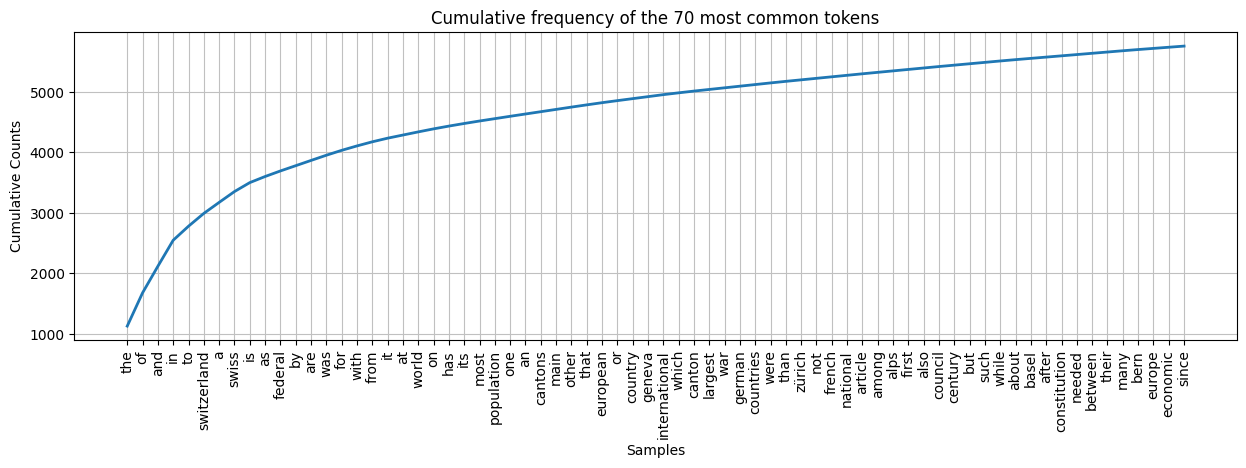

In [31]:
# Please write your Python code in this cell and execute it.
plt.figure(figsize=(15, 4))
ax = fdist.plot(70, cumulative=True, title="Cumulative frequency of the 70 most common tokens")

On peut constater que sur les ~3'000 mots du vocabulaire, les 70 mots les plus fréquents occurent ~5'800 fois. Si on considère le nombre de mots du texte (~16'000), ils représentent 36,25% du texte. Et les 6 premiers mots occurent ~3000 fois soit 18,75% du texte.

Construisez une liste avec la longueur de chaque token du texte, créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (non-cumulative) des nombres d'occurrences pour chaque longueur.  Qu'observez-vous ?

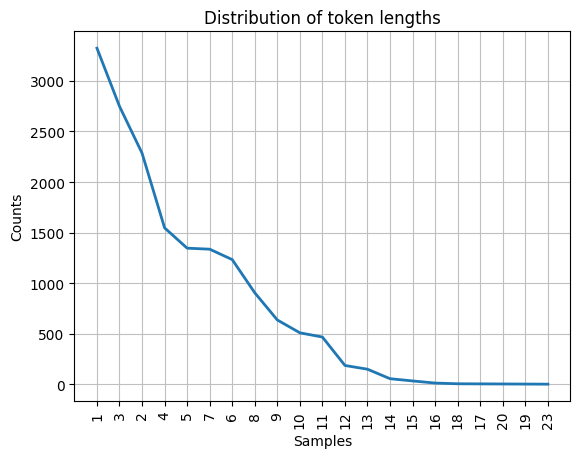

<AxesSubplot:title={'center':'Distribution of token lengths'}, xlabel='Samples', ylabel='Counts'>

In [34]:
# Please write your Python code in this cell and execute it.
tokenLengths = [len(w) for w in word2]
tokenDist = nltk.FreqDist(tokenLengths)
tokenDist.plot(title = "Distribution of token lengths")

La distribution semble similaire à celle de la partie précédente, avec beaucoup de token à 1 caractères (ponctuation) et 3 caractères. Malgré le fait que les textes sont de sujet différents et sur des supports différents (article web, livre), la distribution reste similiaire.

## Fin de la partie 1c du Labo1
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1b et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 